In [2]:
# 단순한 로지스틱 회귀 예제
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
# x(입력), y(결과) 데이터
x_train = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50,
                    -15, 1, 3, -7, 2.5,
                    7, 77, 33, 52, 80])
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                    0, 0, 0, 0, 0,
                    1, 1, 1, 1, 1])

In [4]:
# train 데이터와 test 데이터로 분리 (8:2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=77)

In [6]:
# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()

In [7]:
# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(5, input_dim=1))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [8]:
# 종합
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Optimizer: Stochastic gradient descent (확률적 경사 하강법)
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

In [10]:
# Loss function: binary_crossentropy (이진 교차 엔트로피)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [24]:
# 주어진 X와 y데이터에 대해서 오차를 최소화 하는 방법을 200번 시도한다.
hist = model.fit(x_train, y_train, batch_size=1, epochs=200, validation_split=0.2)

Epoch 1/200
14/14 [==============================] - 0s 5ms/step - loss: 0.0143 - binary_accuracy: 1.0000 - val_loss: 3.4709e-14 - val_binary_accuracy: 1.0000
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 0.0140 - binary_accuracy: 1.0000 - val_loss: 6.9806e-14 - val_binary_accuracy: 1.0000
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 0.0146 - binary_accuracy: 1.0000 - val_loss: 7.1457e-14 - val_binary_accuracy: 1.0000
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 0.0144 - binary_accuracy: 1.0000 - val_loss: 2.9869e-14 - val_binary_accuracy: 1.0000
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 0.0138 - binary_accuracy: 1.0000 - val_loss: 6.0775e-14 - val_binary_accuracy: 1.0000
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.0140 - binary_accuracy: 1.0000 - val_loss: 2.7860e-14 - val_binary_accuracy: 1.0000
Epoch 7/200
14/14 [===========================

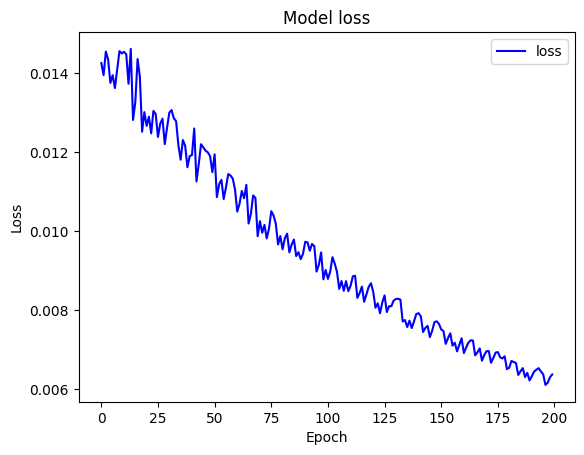

In [25]:
# 모델 손실 함수 시각화
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

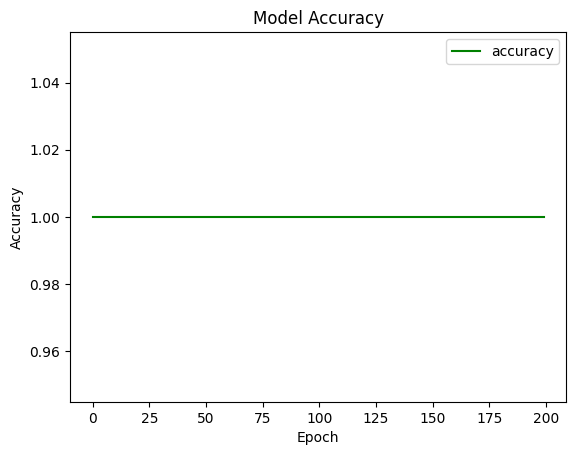

In [26]:
# 모델 정확도 시각화
plt.plot(hist.history['binary_accuracy'], 'g-', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
# 손실 함수 계산
model.evaluate(x_test, y_test, batch_size=1, verbose=2)

5/5 - 0s - loss: 8.2186e-06 - binary_accuracy: 1.0000


[8.218577931984328e-06, 1.0]

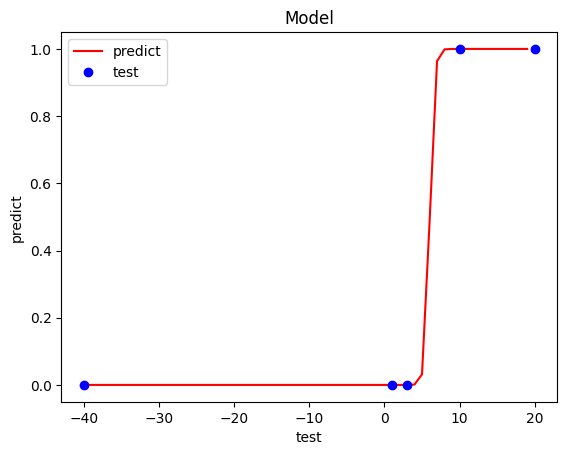

In [28]:
# 모델 시각화
line_x = np.arange(min(x_test), max(x_test))
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(x_test, y_test, 'bo')
plt.title('Model')
plt.xlabel('test')
plt.ylabel('predict')
plt.legend(['predict', 'test'], loc='upper left')
plt.show()

In [29]:
# 모델 테스트
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[4.8181644e-08]
 [1.3795451e-06]
 [3.9445746e-05]
 [1.1277347e-03]
 [6.0061798e-03]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
